## **Coursera Dataset EDA – Introduction**

Welcome to my Exploratory Data Analysis (EDA) project on the Coursera course dataset! In this notebook, I aim to uncover trends, patterns, and key insights from online learning offerings on Coursera by analyzing course-level data such as difficulty, ratings, certificate types, enrollment numbers, and more.

###  **Project Goals**
- Understand the structure and contents of the Coursera dataset
- Clean and prepare the data for analysis
- Explore general trends and characteristics of the courses
- Visualize patterns related to course popularity, quality, and provider performance
- Derive actionable insights that could help learners choose courses or assist providers in designing and promoting content

### **What to Expect**
This project is structured into five main sections:
1. **Loading and Understanding the Data** – Get a feel for the dataset's size and features
2. **Data Cleaning** – Standardize, fix, and prepare the data for analysis
3. **Exploratory Data Analysis (EDA)** – Use visualizations to explore:
   - Course difficulty and types
   - Enrollment trends and popular courses
   - Course ratings and quality
   - Relationships between course features
<!-- 4. **Key Insights** – Highlight major findings and what they could mean
5. **Bonus Ideas** – Brainstorm ways this analysis could be taken further -->

## Let’s dive in!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir("/Users/KhristianNovoa/Desktop/Turing College/")

coursera_filepath = "Data Visualization Project/coursera.csv"
coursera_data = pd.read_csv(coursera_filepath)
coursera_data.head(20)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)Â² Systems Security Certified Practitione...,(ISC)Â²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k
5,661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.7,Beginner,39k
6,54,AI For Everyone,deeplearning.ai,COURSE,4.8,Beginner,350k
7,488,AI For Medical Treatment,deeplearning.ai,COURSE,4.8,Intermediate,2.4k
8,58,AI Foundations for Everyone,IBM,SPECIALIZATION,4.7,Beginner,61k
9,129,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.7,Intermediate,12k


In [2]:
coursera_data.drop(columns=["Unnamed: 0"], inplace=True)

coursera_data = coursera_data.apply(
    lambda x: x.str.strip() if x.dtype == "object" else x
)

In [3]:
def convert_students(val):
    val = str(val).lower().replace("k", "e3").replace("m", "e6")
    return float(eval(val))


coursera_data["course_students_enrolled"] = coursera_data[
    "course_students_enrolled"
].apply(convert_students)

coursera_data["course_difficulty"] = (
    coursera_data["course_difficulty"].str.lower().str.strip()
)
coursera_data["course_Certificate_type"] = coursera_data[
    "course_Certificate_type"
].str.lower()
coursera_data["course_organization"] = (
    coursera_data["course_organization"].str.strip().str.title()
)

In [4]:
coursera_data.isnull().sum()

course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [5]:
coursera_data["course_difficulty"].value_counts()

course_difficulty
beginner        487
intermediate    198
mixed           187
advanced         19
Name: count, dtype: int64

In [6]:
coursera_data.dtypes
coursera_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    float64
dtypes: float64(2), object(4)
memory usage: 41.9+ KB


In [7]:
coursera_data.describe()

,course_rating,course_students_enrolled
count,891.000000,8.910000e+02
mean,4.677329,9.055208e+04
std,0.162225,1.819365e+05
min,3.300000,1.500000e+03
25%,4.600000,1.750000e+04
50%,4.700000,4.200000e+04
75%,4.800000,9.950000e+04
max,5.000000,3.200000e+06


In [8]:
coursera_data.sort_values(by="course_students_enrolled", ascending=False).head(20)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
564,Machine Learning,Stanford University,course,4.9,mixed,3200000.0
815,The Science of Well-Being,Yale University,course,4.9,mixed,2500000.0
688,Python for Everybody,University Of Michigan,specialization,4.8,beginner,1500000.0
674,Programming for Everybody (Getting Started wit...,University Of Michigan,course,4.8,mixed,1300000.0
196,Data Science,Johns Hopkins University,specialization,4.5,beginner,830000.0
129,Career Success,"University Of California, Irvine",specialization,4.4,beginner,790000.0
261,English for Career Development,University Of Pennsylvania,course,4.8,mixed,760000.0
765,Successful Negotiation: Essential Strategies a...,University Of Michigan,course,4.8,mixed,750000.0
199,Data Science: Foundations using R,Johns Hopkins University,specialization,4.6,beginner,740000.0
211,Deep Learning,Deeplearning.Ai,specialization,4.8,intermediate,690000.0


## **General Overview**

In this section, we explore the **overall structure of the Coursera course offerings** to get a high-level understanding of the dataset. The goal is to identify how courses are distributed across various categories such as difficulty, certificate type, and organization.

### Key Questions:
- How are courses distributed by **difficulty level** (beginner, intermediate, mixed)?
- Which organizations offer the **most courses**?
- What are the most common **certificate types**?

###  Visualizations:
- **Top 10 Organizations by Course Count** – Identify which universities or companies are the most active content providers.
- **Course Difficulty Distribution** – See which difficulty level is most common across the platform.
- **Course Count by Certificate Type** – Determine the proportion of courses that are part of a specialization vs. individual course offerings.

These visualizations help us form a baseline understanding of the dataset and set the stage for deeper analysis in the next sections.

In [9]:
top_organizations = (
    coursera_data["course_organization"].value_counts().head(10).reset_index()
)
top_organizations.columns = ["course_organization", "course_count"]
top_organizations

,course_organization,course_count
0,University Of Pennsylvania,59
1,University Of Michigan,41
2,Google Cloud,34
3,Johns Hopkins University,28
4,Duke University,28
5,"University Of California, Irvine",27
6,Ibm,22
7,University Of Illinois At Urbana-Champaign,22
8,"University Of California, Davis",21
9,University Of Colorado Boulder,19


### Top 10 Organizations by Course Count

This chart shows the ten organizations offering the most courses on Coursera.  
It helps identify the most active content providers, such as universities or companies contributing heavily to the platform.

/var/folders/2d/yxn_77j95fd6_jh29fjkjcy00000gn/T/ipykernel_3756/1820323979.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


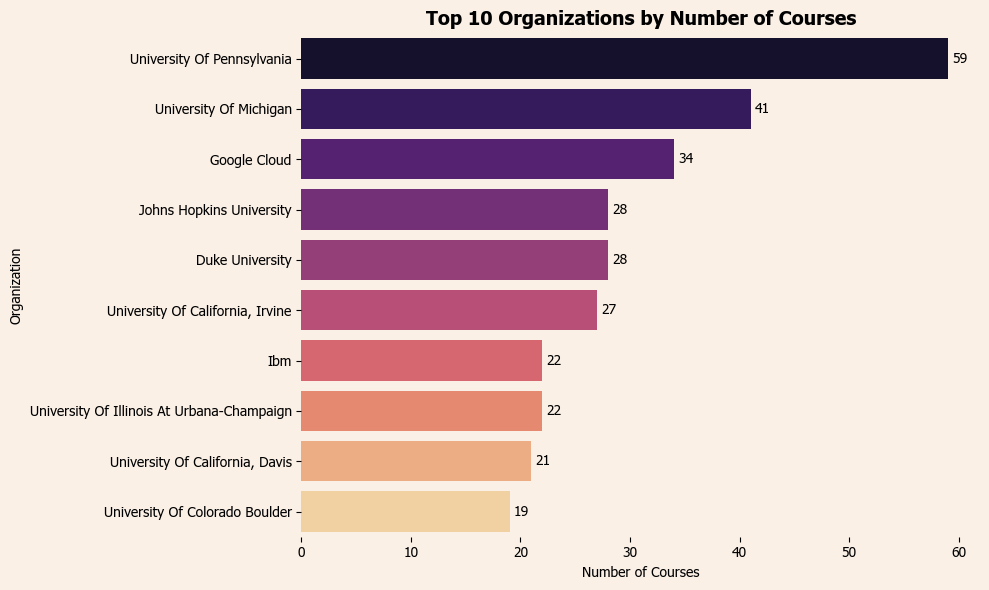

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Tahoma"

background = "#faf0e6"


top_organizations = (
    coursera_data["course_organization"].value_counts().head(10).reset_index()
)
top_organizations.columns = ["course_organization", "course_count"]


fig, ax = plt.subplots(figsize=(10, 6), facecolor=background)


sns.barplot(
    data=top_organizations,
    y="course_organization",
    x="course_count",
    palette="magma",
    ax=ax,
)

for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=3)


for spine in ax.spines.values():
    spine.set_visible(False)


ax.set_title("Top 10 Organizations by Number of Courses", fontsize=14, weight="bold")
ax.set_xlabel("Number of Courses")
ax.set_ylabel("Organization")
ax.set_facecolor(background)


plt.tight_layout()
plt.show()

In [11]:
course__difficulty_numbers = (
    coursera_data["course_difficulty"].value_counts().reset_index()
)
course__difficulty_numbers.columns = ["course_difficulty", "course_count"]
course__difficulty_numbers

,course_difficulty,course_count
0,beginner,487
1,intermediate,198
2,mixed,187
3,advanced,19


### Course Difficulty Distribution

This bar chart displays the number of courses by their assigned difficulty level (e.g., Beginner, Intermediate, Mixed).  
It helps us understand the overall balance of content complexity on the Coursera platform.

Insight: A large portion of courses are labeled as "Beginner," suggesting Coursera’s focus on entry-level learners.

/var/folders/2d/yxn_77j95fd6_jh29fjkjcy00000gn/T/ipykernel_3756/3657306647.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


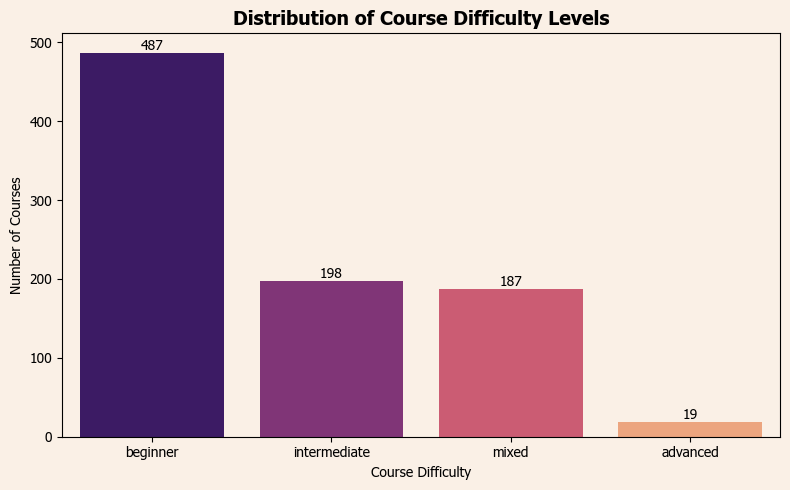

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Tahoma"

background = "#faf0e6"

fig, ax = plt.subplots(figsize=(8, 5), facecolor=background)


sns.countplot(
    data=coursera_data,
    x="course_difficulty",
    order=["beginner", "intermediate", "mixed", "advanced"],
    palette="magma",
    ax=ax,
)


for container in ax.containers:
    ax.bar_label(container, padding=0)


ax.set_title("Distribution of Course Difficulty Levels", fontsize=14, weight="bold")
ax.set_xlabel("Course Difficulty")
ax.set_ylabel("Number of Courses")

ax.set_facecolor(background)

plt.tight_layout()
plt.show()

In [13]:
course__certificate = (
    coursera_data["course_Certificate_type"].value_counts().reset_index()
)
course__certificate.columns = ["course_Certificate_type", "course_count"]
course__certificate

,course_Certificate_type,course_count
0,course,582
1,specialization,297
2,professional certificate,12


### Course Count by Certificate Type

This bar chart compares the number of courses offered by certificate type (e.g., Course vs Specialization).  
It reveals how Coursera structures its offerings and which format is more common.

Insight: Courses significantly outnumber specializations, showing that most content is designed as standalone learning units.

/var/folders/2d/yxn_77j95fd6_jh29fjkjcy00000gn/T/ipykernel_3756/3175290618.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/2d/yxn_77j95fd6_jh29fjkjcy00000gn/T/ipykernel_3756/3175290618.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=15)


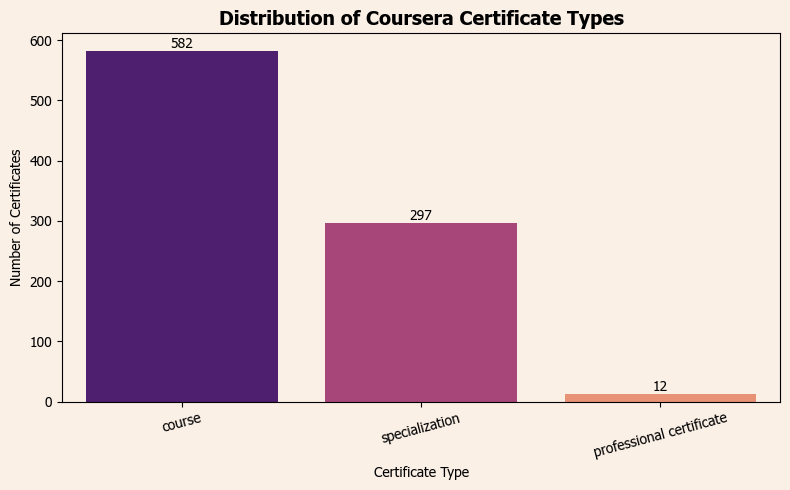

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Tahoma"

background = "#faf0e6"

fig, ax = plt.subplots(figsize=(8, 5), facecolor=background)


sns.countplot(
    data=coursera_data,
    x="course_Certificate_type",
    order=["course", "specialization", "professional certificate"],
    palette="magma",
    ax=ax,
)


for container in ax.containers:
    ax.bar_label(container, padding=0)


ax.set_title("Distribution of Coursera Certificate Types", fontsize=14, weight="bold")
ax.set_xlabel("Certificate Type")
ax.set_ylabel("Number of Certificates")
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)


ax.set_facecolor(background)

plt.tight_layout()
plt.show()

## **Popularity and Engagement**

This section focuses on **how popular each course is**, based on the number of students enrolled. By analyzing enrollment data, we can gain insights into which courses and organizations are resonating most with learners.

### Key Questions:
- Which **individual courses** have the highest enrollment?
- Which **organizations** attract the most students on average?
- Are there any **outliers or skewed patterns** in how courses are enrolled?

### Visualizations:
- **Top 10 Courses by Enrollment** – Highlights the most popular courses based on total student enrollment.
- **Average Enrollment by Organization (Top 10)** – Shows which universities or companies draw the largest average audiences.
- **Distribution of Students Enrolled** – Explores the spread and skewness of enrollment values, and identifies possible outliers or viral hits.

This part of the analysis helps identify trends in course demand and highlights key contributors to Coursera’s learner base.

In [15]:
popular_courses = (
    coursera_data[["course_title", "course_students_enrolled"]]
    .sort_values(by="course_students_enrolled", ascending=False)
    .head(10)
)

popular_courses

,course_title,course_students_enrolled
564,Machine Learning,3200000.0
815,The Science of Well-Being,2500000.0
688,Python for Everybody,1500000.0
674,Programming for Everybody (Getting Started wit...,1300000.0
196,Data Science,830000.0
129,Career Success,790000.0
261,English for Career Development,760000.0
765,Successful Negotiation: Essential Strategies a...,750000.0
199,Data Science: Foundations using R,740000.0
211,Deep Learning,690000.0


### Top 10 Courses by Enrollment

This bar chart highlights the ten most popular courses based on total student enrollment.  
It shows which individual courses have attracted the largest audiences on Coursera.

- Insight: These high-enrollment courses may indicate topics in high demand or those promoted heavily by Coursera.

/var/folders/2d/yxn_77j95fd6_jh29fjkjcy00000gn/T/ipykernel_3756/497224704.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2d/yxn_77j95fd6_jh29fjkjcy00000gn/T/ipykernel_3756/497224704.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=9, wrap=True)


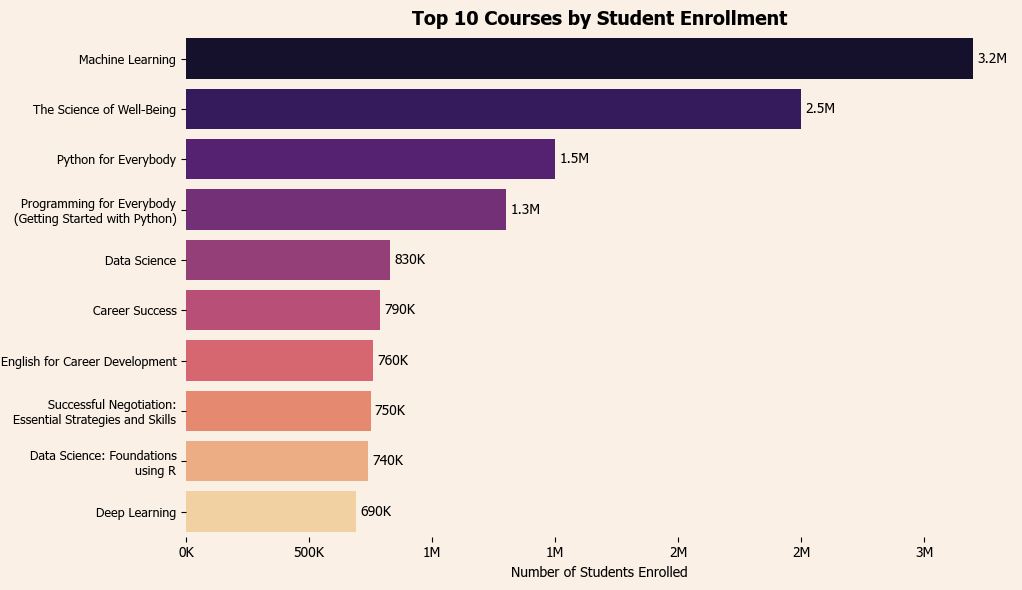

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams["font.family"] = "Tahoma"
background = "#faf0e6"


top_courses = coursera_data.sort_values(
    by="course_students_enrolled", ascending=False
).head(10)


fig, ax = plt.subplots(figsize=(10, 6), facecolor=background)


sns.barplot(
    data=top_courses,
    y="course_title",
    x="course_students_enrolled",
    palette="magma",
    ax=ax,
)

for spine in ax.spines.values():
    spine.set_visible(False)

for container in ax.containers:
    labels = []
    for val in container.datavalues:
        if val >= 1_000_000:
            label = f"{val/1_000_000:.1f}M"
        else:
            label = f"{int(val/1_000):,}K"
        labels.append(label)

    ax.bar_label(container, labels=labels, padding=3)


ax.set_title("Top 10 Courses by Student Enrollment", fontsize=14, weight="bold")
ax.set_xlabel("Number of Students Enrolled")
ax.set_ylabel("Course")
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9, wrap=True)
ax.set_facecolor(background)
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"{int(x/1e6)}M" if x >= 1e6 else f"{int(x/1e3)}K")
)


plt.tight_layout()
plt.show()

In [17]:
for name in coursera_data["course_organization"].unique():
    if "Ã" in name or "ã" in name or "¼" in name or "‰" in name or "Â" in name:
        corrupted_names = {
            "(Isc)Â²": "(ISC)²",
            "Universidad Nacional Autã³Noma De Mã©Xico": "Universidad Nacional Autónoma De México",
            "Universitã  Bocconi": "Università Bocconi",
            "Pontificia Universidad Catã³Lica De Chile": "Pontificia Universidad Católica De Chile",
            "Universitat Autã²Noma De Barcelona": "Universitat Autònoma De Barcelona",
            "Ludwig-Maximilians-Universitã¤T Mã¼Nchen (Lmu)": "Ludwig-Maximilians-Universität München (LMU)",
            "Tecnolã³Gico De Monterrey": "Tecnológico De Monterrey",
            "Ã‰Cole Polytechnique Fã©Dã©Rale De Lausanne": "École Polytechnique Fédérale De Lausanne",
            "Universidade De Sã£O Paulo": "Universidade De São Paulo",
            "Fundaã§Ã£O Instituto De Administraã§Ã£O": "Fundação Instituto De Administração",
            "Ã‰Cole Des Ponts Paristech": "École des Ponts ParisTech",
            "Ã‰Cole Polytechnique": "École Polytechnique",
        }
corrupted_names

{'(Isc)Â²': '(ISC)²',
 'Universidad Nacional Autã³Noma De Mã©Xico': 'Universidad Nacional Autónoma De México',
 'Universitã  Bocconi': 'Università Bocconi',
 'Pontificia Universidad Catã³Lica De Chile': 'Pontificia Universidad Católica De Chile',
 'Universitat Autã²Noma De Barcelona': 'Universitat Autònoma De Barcelona',
 'Ludwig-Maximilians-Universitã¤T Mã¼Nchen (Lmu)': 'Ludwig-Maximilians-Universität München (LMU)',
 'Tecnolã³Gico De Monterrey': 'Tecnológico De Monterrey',
 'Ã‰Cole Polytechnique Fã©Dã©Rale De Lausanne': 'École Polytechnique Fédérale De Lausanne',
 'Universidade De Sã£O Paulo': 'Universidade De São Paulo',
 'Fundaã§Ã£O Instituto De Administraã§Ã£O': 'Fundação Instituto De Administração',
 'Ã‰Cole Des Ponts Paristech': 'École des Ponts ParisTech',
 'Ã‰Cole Polytechnique': 'École Polytechnique'}

###  Average Enrollment by Organization (Top 10)

This visualization displays the top ten organizations with the highest **average** student enrollment across their courses.  
It helps us identify not just who offers the most courses — but who consistently draws large numbers of learners.

- Insight: Some organizations may offer fewer courses but attract large enrollments, indicating high course quality or strong reputations.

/var/folders/2d/yxn_77j95fd6_jh29fjkjcy00000gn/T/ipykernel_3756/1607690548.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/2d/yxn_77j95fd6_jh29fjkjcy00000gn/T/ipykernel_3756/1607690548.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)


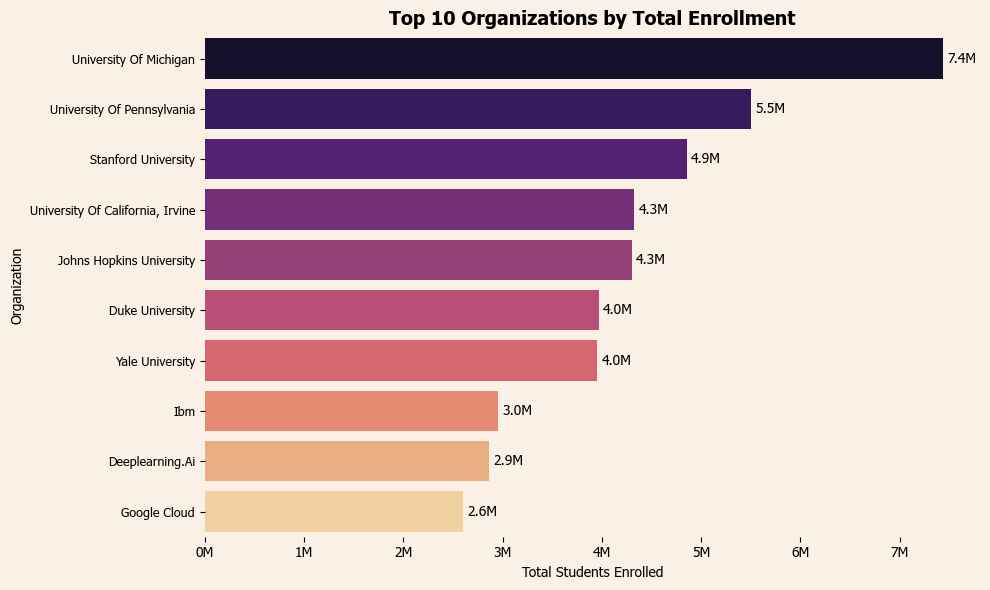

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams["font.family"] = "Tahoma"
background = "#faf0e6"


coursera_data["course_organization"] = coursera_data["course_organization"].replace(
    corrupted_names
)


total_enrollment = (
    coursera_data.groupby("course_organization")["course_students_enrolled"]
    .sum()
    .reset_index()
    .sort_values(by="course_students_enrolled", ascending=False)
    .head(10)
)


fig, ax = plt.subplots(figsize=(10, 6), facecolor=background)


sns.barplot(
    data=total_enrollment,
    y="course_organization",
    x="course_students_enrolled",
    palette="magma",
    ax=ax,
)


for container in ax.containers:
    labels = [
        (
            f"{val/1_000_000:.1f}M"
            if val >= 1_000_000
            else f"{val/1_000:.1f}K"
            if val >= 1_000
            else f"{int(val)}"
        )
        for val in container.datavalues
    ]
    ax.bar_label(container, labels=labels, padding=3)


for spine in ax.spines.values():
    spine.set_visible(False)

ax.set_title("Top 10 Organizations by Total Enrollment", fontsize=14, weight="bold")
ax.set_xlabel("Total Students Enrolled")
ax.set_ylabel("Organization")
ax.set_facecolor(background)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x/1000000):,}M"))

plt.tight_layout()
plt.show()

### 📊 Distribution of Students Enrolled

This chart explores the overall distribution of student enrollment across all courses.  
It helps detect whether enrollments are evenly spread or if a few courses have disproportionately high numbers.

> Insight: The distribution is likely right-skewed, with most courses having modest enrollment and a few viral outliers.

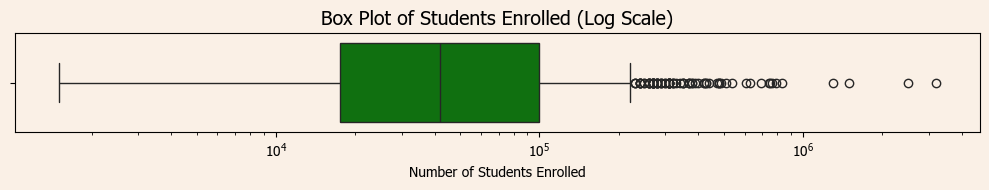

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams["font.family"] = "Tahoma"
background = "#faf0e6"

fig, ax = plt.subplots(figsize=(10, 2), facecolor=background)
ax.set_facecolor(background)
sns.set_style("whitegrid")

filtered_data = coursera_data[coursera_data["course_students_enrolled"] > 0]


sns.boxplot(x="course_students_enrolled", data=filtered_data, color="green", ax=ax)


ax.set_xscale("log")


ax.set_title("Box Plot of Students Enrolled (Log Scale)", fontsize=14)
ax.set_xlabel("Number of Students Enrolled")

plt.tight_layout()
plt.show()

## **Ratings and Quality**

In this section, we examine how learners rate the courses and whether certain factors — like difficulty or certificate type — influence those ratings. Course ratings can help us assess the perceived quality and satisfaction levels of students.

### Key Questions:
- What does the **overall rating distribution** look like?
- Do **beginner**, **intermediate**, or **mixed** difficulty courses receive higher ratings?
- Are **specialization** tracks rated more highly than **standalone courses**?

### Visualizations:
- **Distribution of Course Ratings** – Visualizes how course ratings are spread across the dataset, and whether most courses are well-reviewed.
- **Boxplot of Ratings by Difficulty** – Compares the spread and median ratings across different difficulty levels.
- **Average Rating by Certificate Type** – Explores whether certificate type (e.g., course vs. specialization) has any impact on student satisfaction.

This section helps uncover what learners value most and whether course complexity or structure affects the way courses are rated.

### Distribution of Course Ratings

This box chart shows how course ratings are distributed across the dataset.  
It helps us understand how well learners rate their experiences on Coursera overall.

> Insight: Most courses appear to have relatively high ratings, indicating a generally positive learner experience.

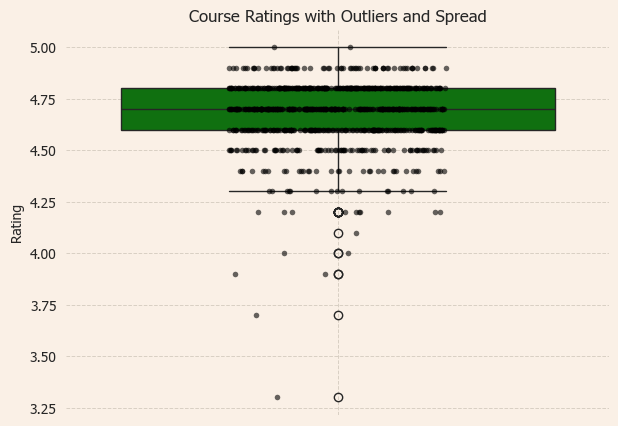

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams["font.family"] = "Tahoma"
background = "#faf0e6"
fig, ax = plt.subplots(figsize=(7, 5), facecolor=background)
ax.set_facecolor(background)


sns.boxplot(y="course_rating", data=coursera_data, ax=ax, color="green")


sns.stripplot(
    y="course_rating",
    data=coursera_data,
    ax=ax,
    color="black",
    size=4,
    jitter=0.2,
    alpha=0.6,
)


ax.set_title("Course Ratings with Outliers and Spread")
ax.set_ylabel("Rating")
ax.grid(True, color="#d8cfc3", linestyle="--", linewidth=0.7)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()

### Boxplot of Ratings by Difficulty

This boxplot compares the distribution of course ratings across different difficulty levels (Beginner, Intermediate, Mixed).  
It helps evaluate whether course complexity has an impact on how well learners rate their experience.

> Insight: The median ratings are fairly consistent across levels, though variability may differ slightly.

/var/folders/2d/yxn_77j95fd6_jh29fjkjcy00000gn/T/ipykernel_3756/823675623.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


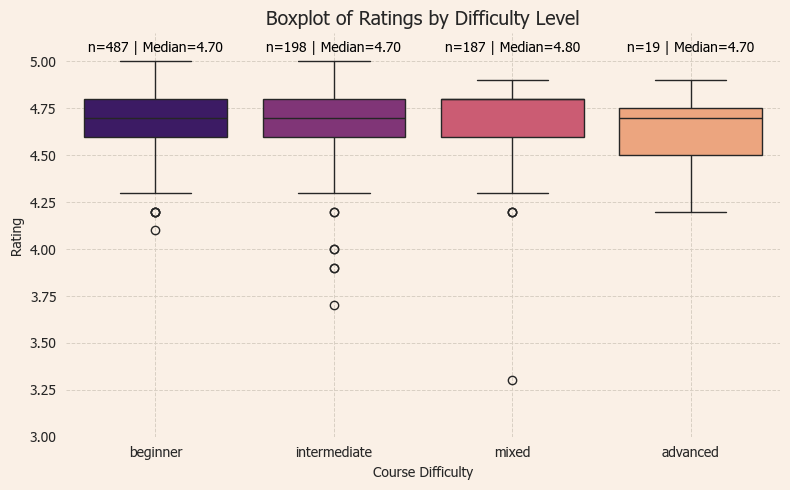

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Tahoma"
background = "#faf0e6"


difficulty_order = ["beginner", "intermediate", "mixed", "advanced"]


difficulty_summary = (
    coursera_data.groupby("course_difficulty")
    .agg(
        course_count=("course_rating", "count"),
        median_rating=("course_rating", "median"),
    )
    .reindex(difficulty_order)
    .reset_index()
)


fig, ax = plt.subplots(figsize=(8, 5), facecolor=background)
ax.set_facecolor(background)

sns.boxplot(
    data=coursera_data,
    x="course_difficulty",
    y="course_rating",
    palette="magma",
    order=difficulty_order,
    ax=ax,
)


for i, row in difficulty_summary.iterrows():
    label = f"n={row['course_count']} | Median={row['median_rating']:.2f}"
    ax.text(i, 5.05, label, ha="center", fontsize=10, color="black")


ax.set_title("Boxplot of Ratings by Difficulty Level", fontsize=14)
ax.set_xlabel("Course Difficulty")
ax.set_ylabel("Rating")
ax.set_ylim(3.0, 5.15)
ax.grid(True, color="#d8cfc3", linestyle="--", linewidth=0.7)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

/var/folders/2d/yxn_77j95fd6_jh29fjkjcy00000gn/T/ipykernel_3756/867716476.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


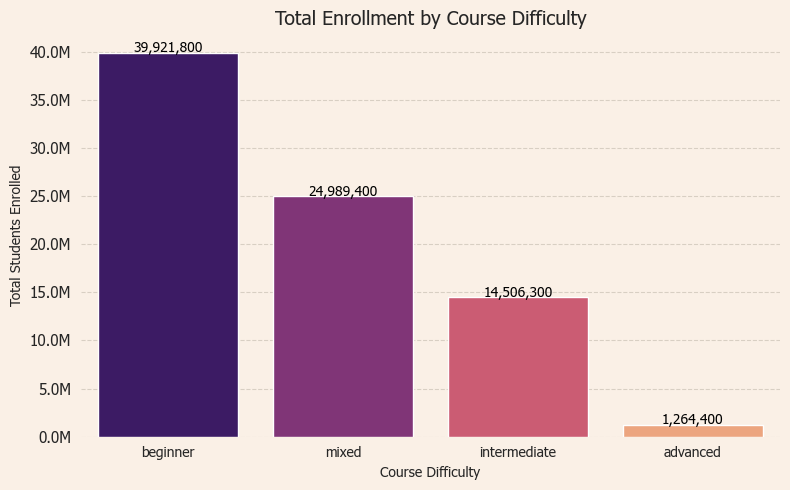

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Tahoma"
background = "#faf0e6"


difficulty_enrollment = (
    coursera_data.groupby("course_difficulty")["course_students_enrolled"]
    .sum()
    .reset_index()
)

difficulty_enrollment = difficulty_enrollment.sort_values(
    by="course_students_enrolled", ascending=False
)


fig, ax = plt.subplots(figsize=(8, 5), facecolor=background)
ax.set_facecolor(background)

sns.barplot(
    data=difficulty_enrollment,
    x="course_difficulty",
    y="course_students_enrolled",
    palette="magma",
    ax=ax,
)


for bar, value in zip(ax.patches, difficulty_enrollment["course_students_enrolled"]):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 20000,
        f"{int(value):,}",
        ha="center",
        fontsize=10,
        color="black"
    )


from matplotlib.ticker import FuncFormatter


ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x/1e6:.1f}M"))


ax.tick_params(axis="y", labelsize=11)
ax.set_title("Total Enrollment by Course Difficulty", fontsize=14)
ax.set_xlabel("Course Difficulty")
ax.set_ylabel("Total Students Enrolled")
ax.grid(True, axis="y", linestyle="--", color="#d8cfc3")
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

### Average Rating by Certificate Type

This bar chart shows the average course rating grouped by certificate type (e.g., Course vs Specialization).  
It offers insight into whether learners rate specializations more highly than individual courses.

> Insight: Specializations may be slightly better rated, possibly due to their structured, in-depth learning paths.

/var/folders/2d/yxn_77j95fd6_jh29fjkjcy00000gn/T/ipykernel_3756/902982439.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


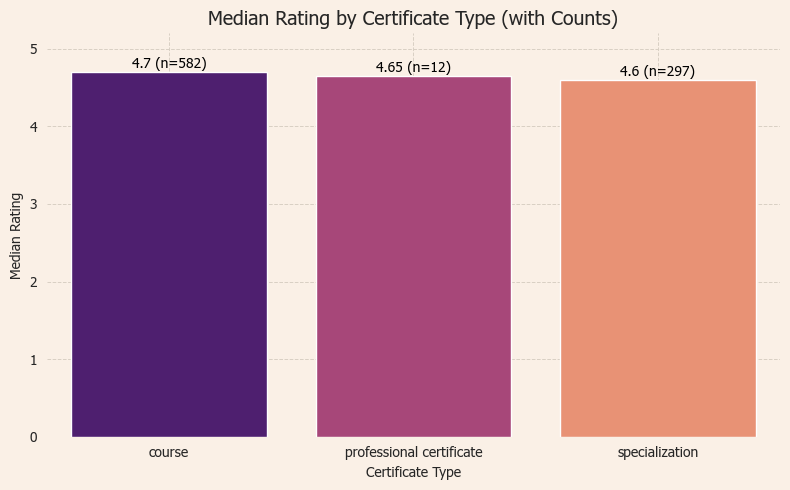

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Tahoma"
background = "#faf0e6"


summary = (
    coursera_data.groupby("course_Certificate_type")
    .agg(
        course_count=("course_rating", "count"),
        median_rating=("course_rating", "median"),
    )
    .reset_index()
)


summary["median_rating"] = summary["median_rating"].round(2)


fig, ax = plt.subplots(figsize=(8, 5), facecolor=background)
ax.set_facecolor(background)


sns.barplot(
    data=summary, x="course_Certificate_type", y="median_rating", palette="magma", ax=ax
)


for index, row in summary.iterrows():
    label = f"{row['median_rating']} (n={row['course_count']})"
    ax.text(
        index,
        row["median_rating"] + 0.05,
        label,
        color="black",
        ha="center",
        fontsize=10,
    )

ax.set_title("Median Rating by Certificate Type (with Counts)", fontsize=14)
ax.set_xlabel("Certificate Type")
ax.set_ylabel("Median Rating")
ax.set_ylim(0, 5.2)


ax.grid(True, color="#d8cfc3", linestyle="--", linewidth=0.7)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

### Number of Courses vs Total Enrollment per Organization

This scatter plot visualizes the relationship between the Number of Courses offered and the Total Students Enrolled for various organizations in the Coursera dataset.


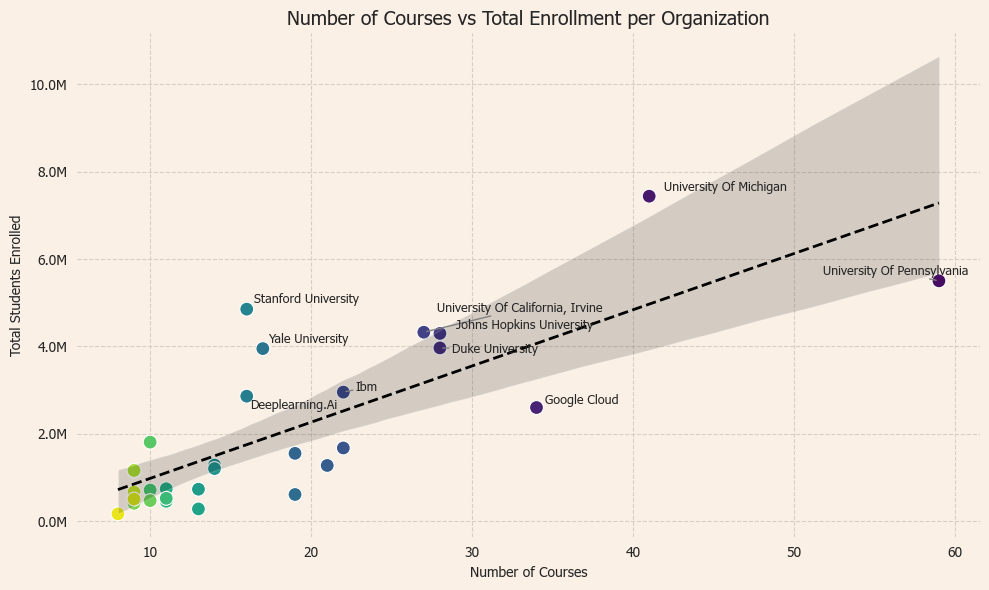

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from adjustText import adjust_text

coursera_data["course_students_enrolled"] = coursera_data[
    "course_students_enrolled"
].apply(convert_students)
coursera_data["course_students_enrolled"] = coursera_data[
    "course_students_enrolled"
].fillna(0)

organization_summary_total = (
    coursera_data.groupby("course_organization")
    .agg(
        number_of_courses=("course_title", "count"),
        total_enrollment=("course_students_enrolled", "sum"),
    )
    .reset_index()
)


organization_summary_total = organization_summary_total.sort_values(
    by="number_of_courses", ascending=False
).head(30)


plt.rcParams["font.family"] = "Tahoma"
background = "#faf0e6"


fig, ax = plt.subplots(figsize=(10, 6), facecolor=background)
ax.set_facecolor(background)


sns.scatterplot(
    data=organization_summary_total,
    x="number_of_courses",
    y="total_enrollment",
    hue="course_organization",
    palette="viridis",
    s=100,
    legend=False,
)

sns.regplot(
    data=organization_summary_total,
    x="number_of_courses",
    y="total_enrollment",
    scatter=False,
    ax=ax,
    color="black",
    line_kws={"linewidth": 2, "linestyle": "--"},
)

top_labels_total = organization_summary_total.sort_values(
    by="total_enrollment", ascending=False
).head(10)


texts = [
    ax.text(
        row["number_of_courses"],
        row["total_enrollment"],
        row["course_organization"],
        fontsize=9,
    )
    for _, row in top_labels_total.iterrows()
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="gray"))


formatter = FuncFormatter(lambda x, _: f"{x / 1_000_000:.1f}M")
ax.yaxis.set_major_formatter(formatter)


ax.set_title("Number of Courses vs Total Enrollment per Organization", fontsize=14)
ax.set_xlabel("Number of Courses")
ax.set_ylabel("Total Students Enrolled")
ax.grid(True, linestyle="--", color="#d8cfc3")
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()